# Gráficos

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

## Base de dados

In [2]:
dataset = pd.read_csv('Bases de dados/census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Gráfico de dispersão

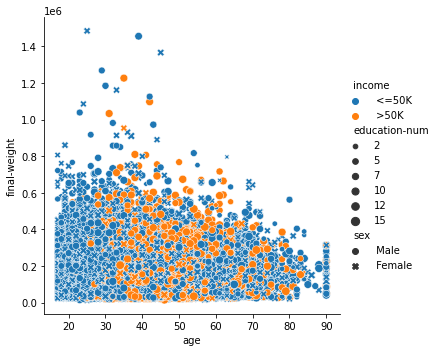

In [3]:
sns.relplot(x = 'age', y = 'final-weight', data = dataset, hue = 'income',
           style = 'sex', size = 'education-num');

## Gráfico de barra e setor (pizza)

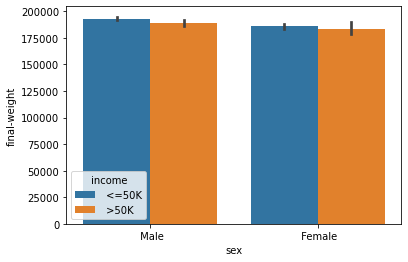

In [4]:
sns.barplot(x = 'sex', y = 'final-weight', data = dataset, hue = 'income');

In [17]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

91047

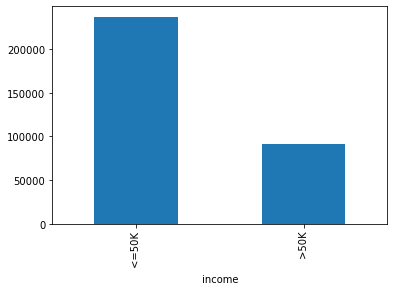

In [6]:
dados_agrupados.plot.bar();

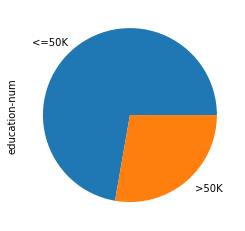

In [7]:
dados_agrupados.plot.pie();

## Gráfico de linha

In [20]:
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}

In [21]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


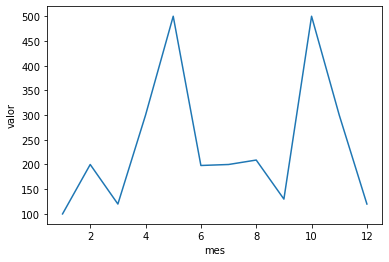

In [26]:
sns.lineplot(x = 'mes', y = 'valor', data = vendas_df);

<AxesSubplot:xlabel='mes', ylabel='valor'>

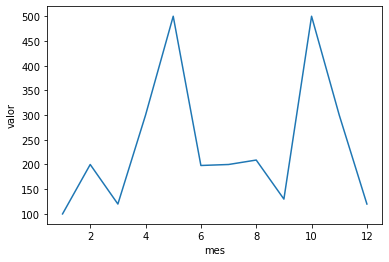

In [25]:
sns.lineplot(x = vendas_df['mes'], y = vendas_df['valor']);

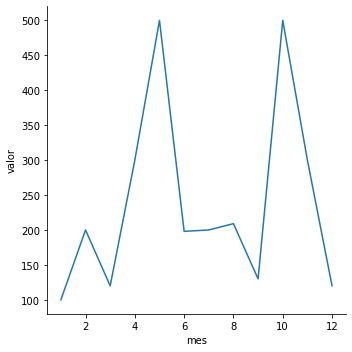

In [28]:
sns.relplot(x = 'mes', y = 'valor', kind = 'line', data = vendas_df);

## Boxplot

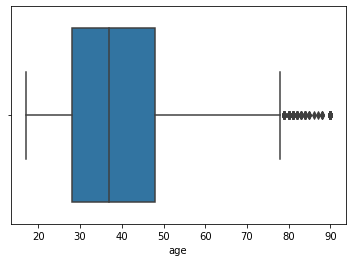

In [31]:
sns.boxplot(dataset['age']);

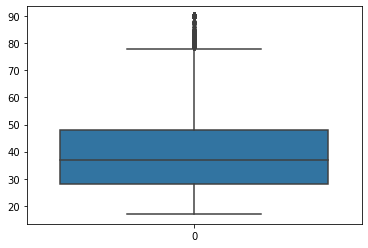

In [37]:
sns.boxplot(data = dataset['age'], orient = 'v');

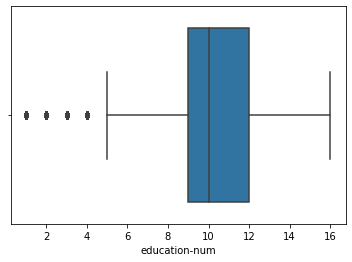

In [38]:
sns.boxplot(dataset['education-num']);

In [42]:
dataset.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [59]:
X = dataset.iloc[:, [0, 2, 4, 10, 11, 12]]
X

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [60]:
y = dataset.iloc[:, 14]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25, random_state=1)
random = RandomForestClassifier()
random.fit(X_treinamento, y_treinamento)
previsoes = random.predict(X_teste)
accuracy_score(y_teste, previsoes)

0.8114482250337797

In [63]:
dataset2 = dataset.iloc[:, [0, 4, 12]]
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


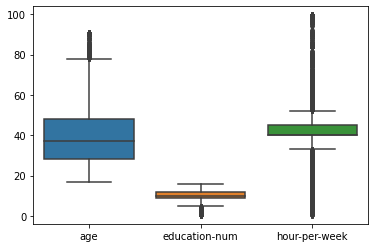

In [64]:
sns.boxplot(data=dataset2);

## Gráficos com atributos categóricos

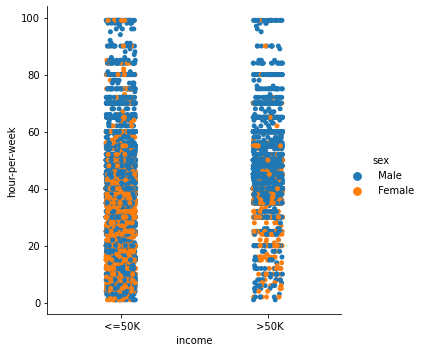

In [65]:
sns.catplot(x = 'income', y = 'hour-per-week', data=dataset, hue = 'sex');

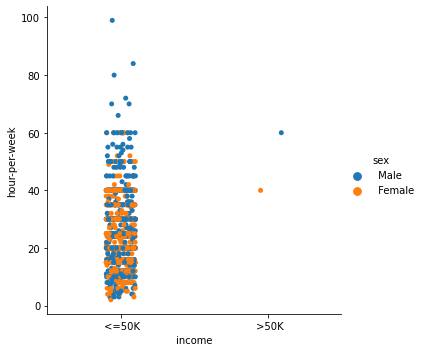

In [69]:
sns.catplot(x = 'income', y = 'hour-per-week',
            data = dataset.query('age < 20'), hue = 'sex');

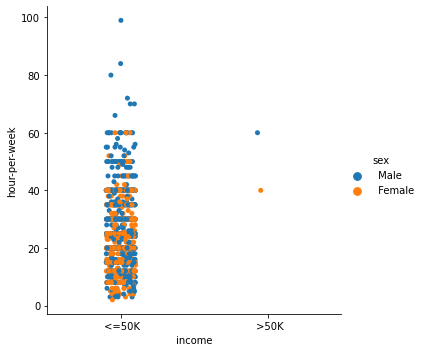

In [71]:
sns.catplot(x = 'income', y = 'hour-per-week',
            data = dataset[dataset['age'] < 20], hue = 'sex');

## Subgráficos

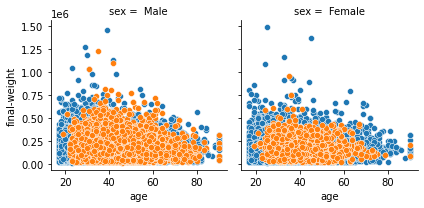

In [72]:
g = sns.FacetGrid(dataset, col='sex', hue = 'income')
g.map(sns.scatterplot, 'age', 'final-weight');

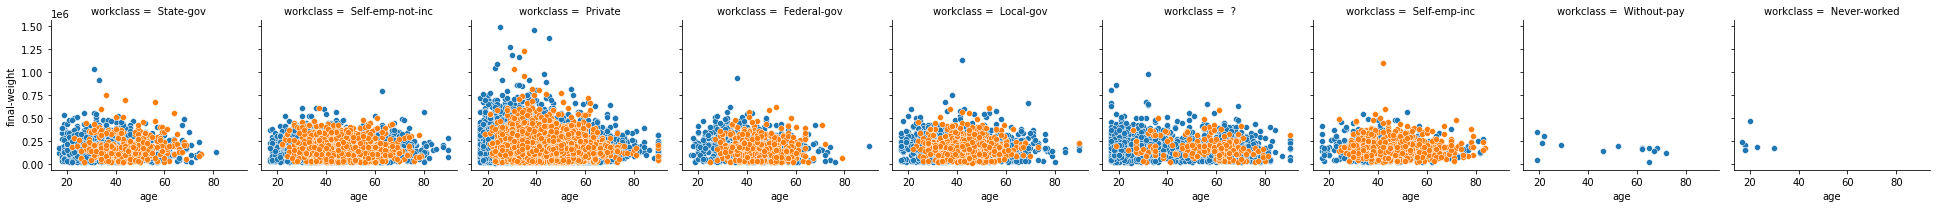

In [74]:
g = sns.FacetGrid(dataset, col='workclass', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight');

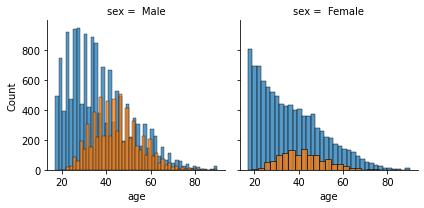

In [75]:
g = sns.FacetGrid(dataset, col = 'sex', hue = 'income')
g.map(sns.histplot, 'age');

In [76]:
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


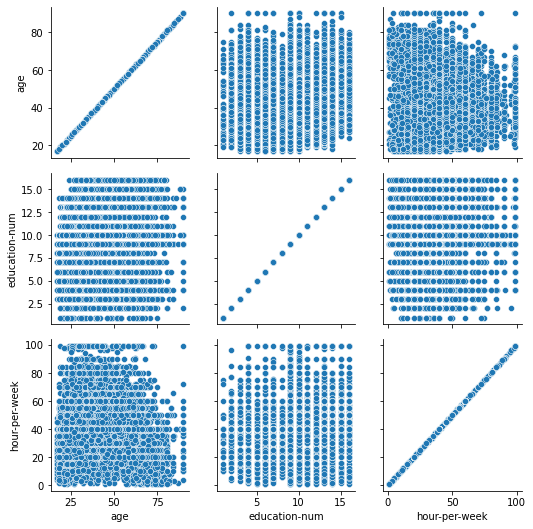

In [78]:
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot);

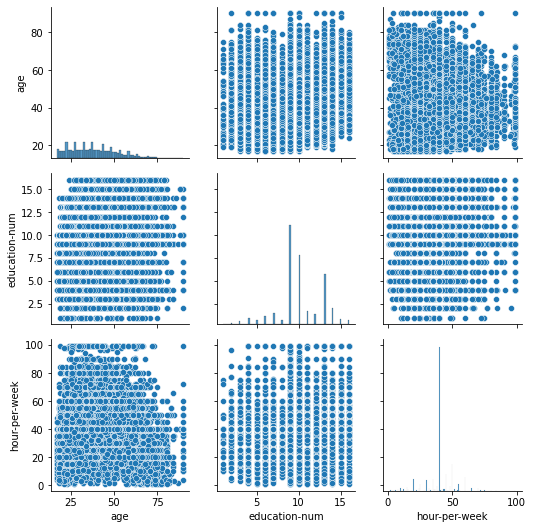

In [79]:
g = sns.PairGrid(dataset2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

## Mapa

In [ ]:
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [81]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.23.4 which is incompatible.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


In [ ]:
#!python -m pip install basemap

In [82]:
from mpl_toolkits.basemap import Basemap

In [109]:
dataset = pd.read_csv('Bases de dados/house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [110]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [107]:
dataset_caros = dataset.sort_values(by = 'price', ascending=False)[0:1000]
dataset_caros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,1257200315,20140705T000000,1200000.0,4,2.50,2700,4275,2.0,0,0,...,9,2700,0,2004,0,98115,47.6725,-122.327,1810,4500
17180,1126059108,20150423T000000,1200000.0,4,3.50,3930,43560,2.0,0,0,...,10,3930,0,2003,0,98072,47.7497,-122.121,2860,36460
1328,4232400860,20140630T000000,1200000.0,4,2.00,2120,3360,2.0,0,0,...,9,2120,0,1905,0,98112,47.6227,-122.310,2090,3600
20593,170000060,20141008T000000,1200000.0,5,3.50,3900,4400,2.0,0,0,...,9,2650,1250,2014,0,98107,47.6607,-122.362,1190,4400


In [111]:
dataset_baratos = dataset.sort_values(by = 'price', ascending=True)[0:1000]
dataset_baratos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,844001145,20150326T000000,208500.0,2,1.00,880,4814,1.0,0,0,...,5,880,0,1906,0,98010,47.3107,-121.999,1010,6160
303,5104530560,20150401T000000,208633.0,3,2.50,2040,3810,2.0,0,0,...,8,2040,0,2006,0,98038,47.3537,-122.000,2370,4590
20819,3336500140,20140919T000000,208800.0,3,2.50,1390,2450,2.0,0,0,...,7,1390,0,2009,0,98118,47.5298,-122.269,1390,2450
13595,425000175,20141013T000000,208950.0,3,1.00,960,5700,1.0,0,0,...,5,960,0,1956,0,98056,47.4983,-122.172,960,5700


In [86]:
dataset['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [87]:
dataset['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [88]:
lat1, lat2 = dataset['lat'].min(), dataset['lat'].max()
lon1, lon2 = dataset['long'].min(), dataset['long'].max()

In [104]:
pip install basemap-data-hires

Note: you may need to restart the kernel to use updated packages.


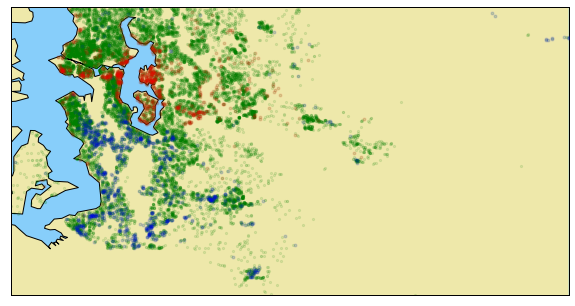

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
m = Basemap(llcrnrlon=lon1, llcrnrlat=lat1, urcrnrlon=lon2, urcrnrlat=lat2,
           projection='cyl', resolution='h')
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s = 5, c = 'green', alpha = 0.1, zorder = 2)
m.scatter(dataset_caros['long'], dataset_caros['lat'], s = 10, c = 'red', alpha = 0.1, zorder = 3)
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s = 10, c = 'blue', alpha = 0.1, zorder = 4);